**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect 


## import bed file

In [2]:
#fdiry = "/data/reddylab/gjohnson/whole_genome_STARRseq/wgss3/epigenome_comparisons/files_for_Kuei"
fdiry = file.path(FD_RLAB, "gjohnson/whole_genome_STARRseq/wgss3/epigenome_comparisons/files_for_Kuei")
fname = "dex_induced_starrseq_peaks_overlapping_GR_P300_and_dnase_peaks_with_headers.txt"
fpath = file.path(fdiry, fname)

dat_region = read_tsv(fpath, show_col_types = FALSE)
head(dat_region)

chr,start,end,name,score,strand,effectSize,inputCount,outputCount,-log(pvalue),-log(qvalue),cohen's_d,peusdoLog2FC
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,8004337,8005840,chr1:8004337-8005840,.,.,7970,3497,11467,4.05,3.50,6.187899,1.566952
chr1,8258845,8259970,chr1:8258845-8259970,.,.,6073,537,6611,6.86,6.04,14.053916,3.122952
chr1,8343090,8344290,chr1:8343090-8344290,.,.,5436,1637,7073,3.53,3.25,4.916071,1.624346
chr1,8347990,8349475,chr1:8347990-8349475,.,.,7779,35,7815,5.11,4.37,6.131302,2.871574
chr1,8396590,8397529,chr1:8396590-8397529,.,.,2365,381,2746,6.40,5.20,12.313543,2.465635
chr1,15355934,15356609,chr1:15355934-15356609,.,.,1377,620,1997,6.21,5.25,9.131807,1.403063


## Explore

In [3]:
dat = dat_region
dat = dat %>% 
    dplyr::select(chr, start, end) %>%
    dplyr::mutate(len = end - start)
head(dat)

chr,start,end,len
<chr>,<dbl>,<dbl>,<dbl>
chr1,8004337,8005840,1503
chr1,8258845,8259970,1125
chr1,8343090,8344290,1200
chr1,8347990,8349475,1485
chr1,8396590,8397529,939
chr1,15355934,15356609,675


In [4]:
print(table(dat$chr))
print(sum(table(dat$chr)))


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
   49    20    32    26    19    14    21    23    29    15    15    60    28 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX 
    8     9    28    19    32    37    35    24    31    15 
[1] 589


In [5]:
chrom = c(1:22, "X", "Y")
paste0("chr", chrom)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22" "chrX"  "chrY"

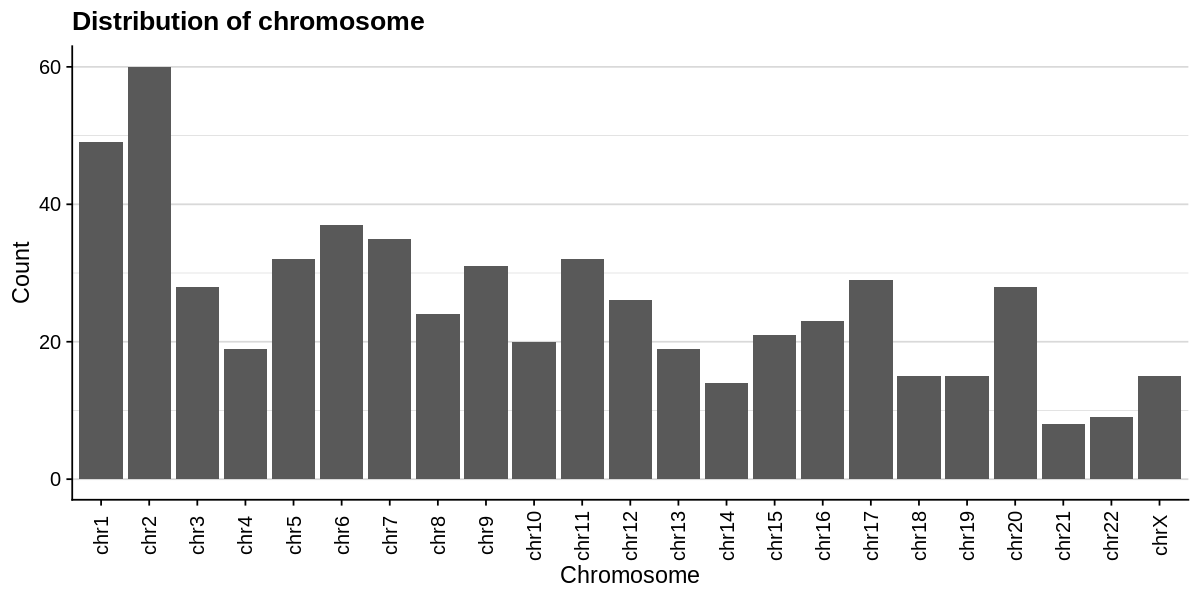

In [10]:
dat$chr = factor(dat$chr, levels = paste0("chr", chrom))
gpt = qplot(dat$chr) + 
    theme_cowplot() + 
    background_grid(major="y", minor="y") + 
    theme(axis.text.x = element_text(vjust = 0.5, angle=90)) +
    labs(x="Chromosome", y="Count", title="Distribution of chromosome")

options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

In [7]:
dat %>% dplyr::filter(chr == "chr17") %>% head

chr,start,end,len
<fct>,<dbl>,<dbl>,<dbl>
chr17,6002561,6003866,1305
chr17,6591570,6592361,791
chr17,8154011,8155261,1250
chr17,14737711,14738911,1200
chr17,20103411,20104207,796
chr17,28808780,28809299,519


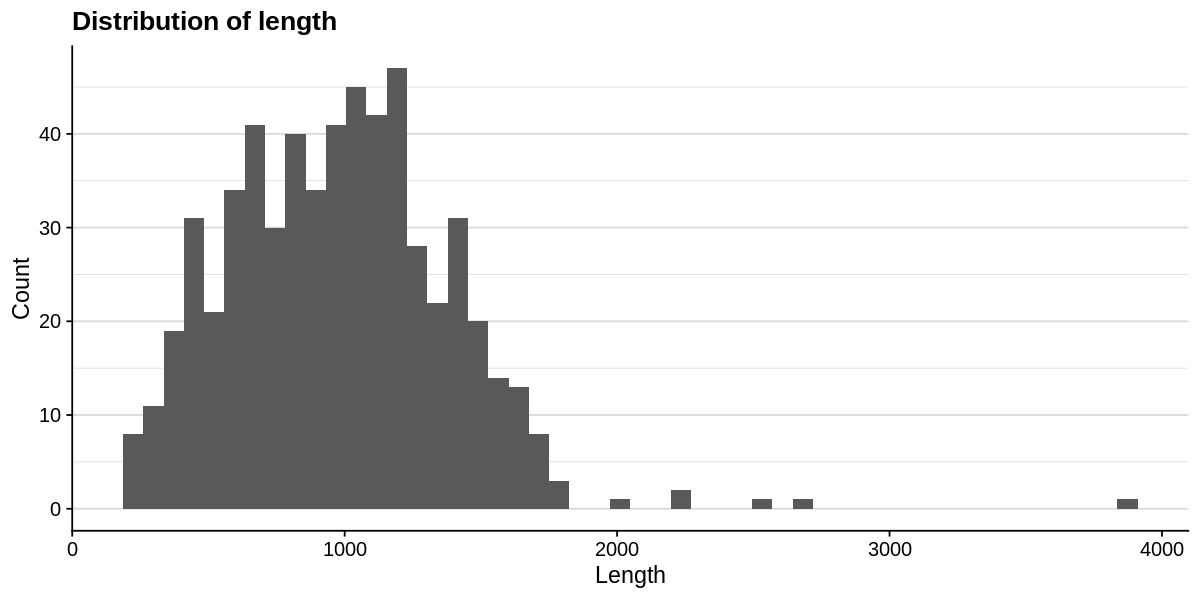

In [9]:
gpt = qplot(dat$len, bins = 50) + 
    theme_cowplot() + 
    background_grid(major="y", minor="y") +
    labs(x="Length", y="Count", title="Distribution of length")

options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

## is upstream of PER1 here

In [38]:
tmp = dat %>% dplyr::filter(chr == "chr17", start >= 8148000, end <= 8160000)
print(dim(tmp))
tmp

[1] 1 4


chr,start,end,len
<fct>,<dbl>,<dbl>,<dbl>
chr17,8154011,8155261,1250


In [11]:
29/589

[1] 0.04923599